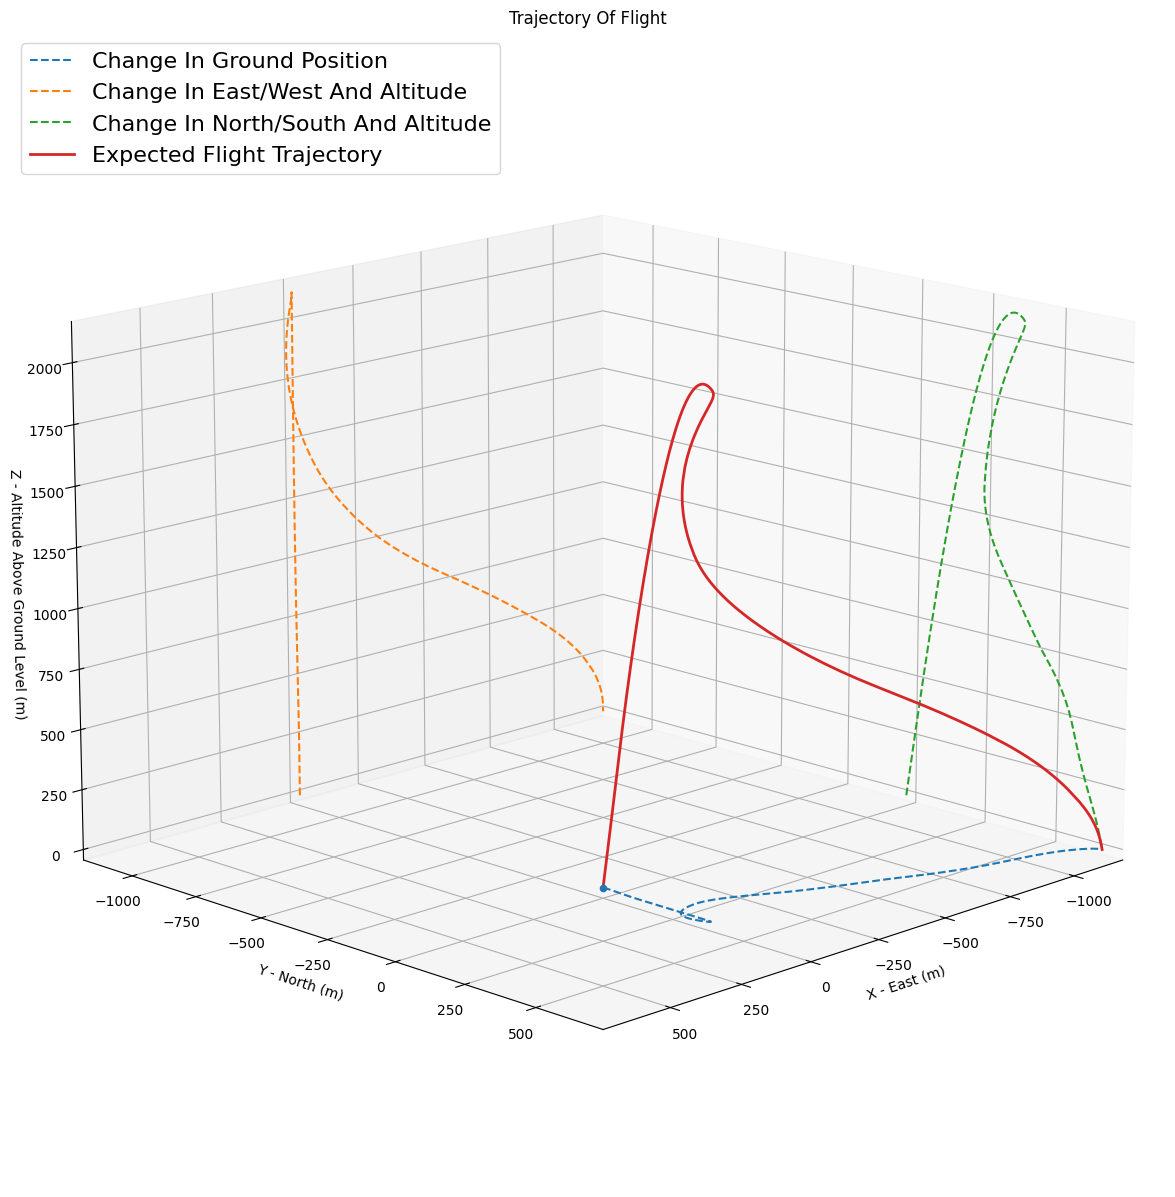

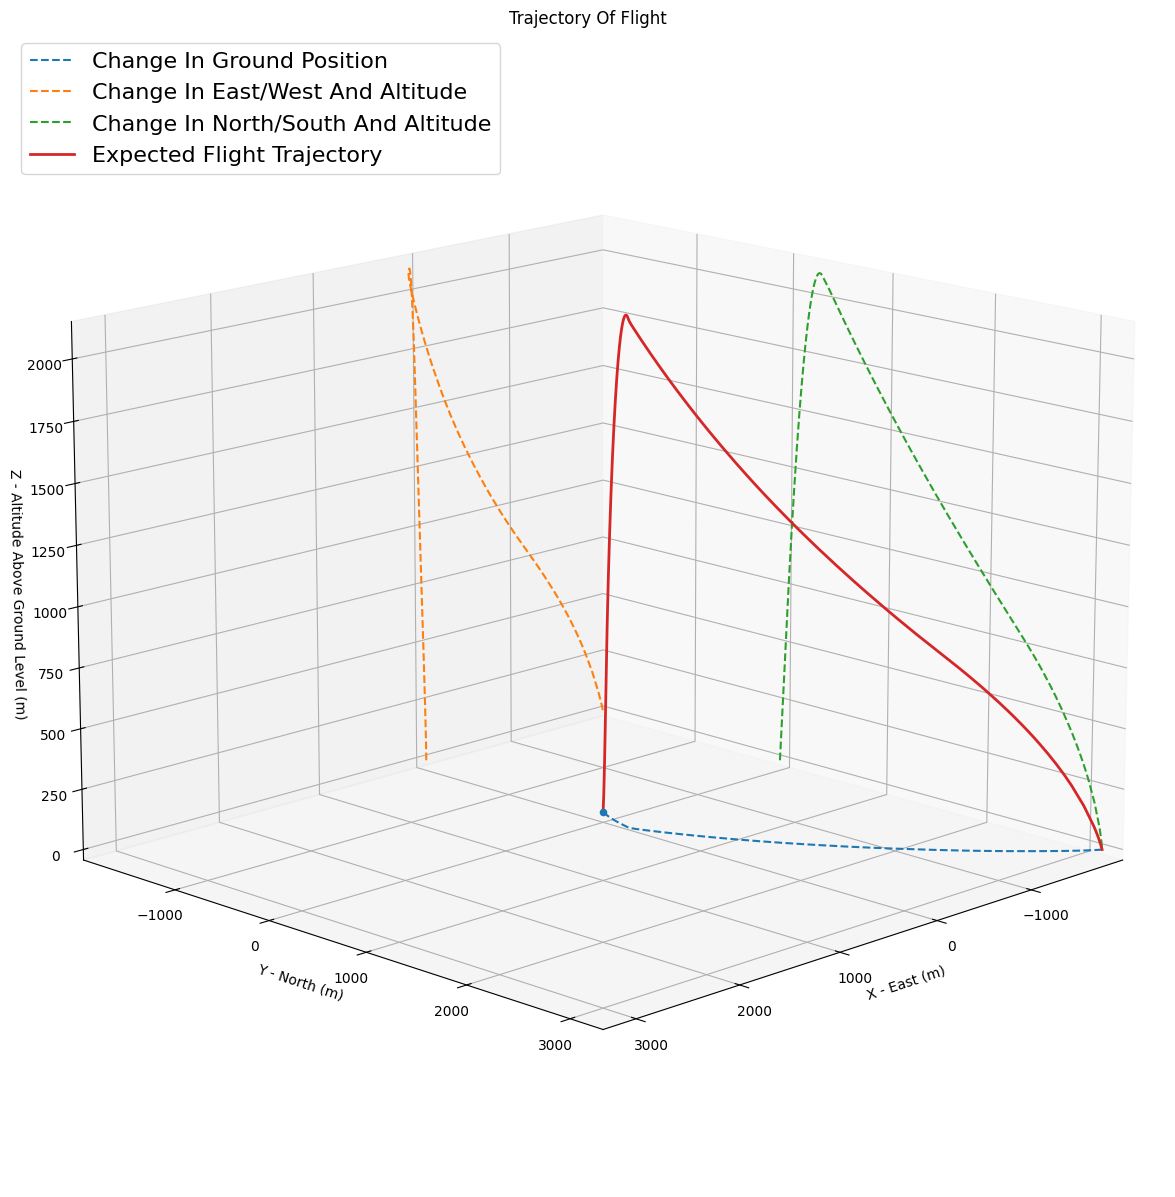

In [3]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

import openpyxl
 
# Define variable to load the dataframe
dataframe = openpyxl.load_workbook("C:\\Users\\mahd\\Documents\\SimulationRocketPy\\WeatherData.xlsx")
 
# Define variable to read sheet
dataframe1 = dataframe.active
 
# Iterate the loop to read the cell values

env = Environment(latitude=33.4328614, longitude=-96.8084617)

import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time
env.set_atmospheric_model(type="Forecast", file = "GFS")
# env.info()

K570 = SolidMotor(
    # MUST CHANGE USER FOR YOURSELF (and probably path too)
    thrust_source= "C:\\Users\\mahd\\Documents\\SimulationRocketPy\\K570-17A.eng",
    dry_mass=1.685,
    dry_inertia=(0, 0, 0),
    nozzle_radius= 0.027305,
    grain_number= 4,
    grain_density= 100,
    grain_outer_radius= 0.027305,
    grain_initial_inner_radius= 0.022,
    grain_initial_height= 0.16256,
    grain_separation= 0,
    grains_center_of_mass_position= 0.33512+0.025,
    center_of_dry_mass_position= 0.33512+0.025,
    nozzle_position=0,
    burn_time= 3.59,
    throat_radius= 0.02,
    coordinate_system_orientation= "nozzle_to_combustion_chamber",
)


l2Rocket = Rocket(
    radius= 0.0525,
    mass= 4.684,
    inertia=(3.321, 4.321, 0.024),
    power_off_drag="C:\\Users\\mahd\\Documents\\SimulationRocketPy\\L2MotorOn.csv",
    power_on_drag="C:\\Users\\mahd\\Documents\\SimulationRocketPy\\L2MotorOff.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

# rail_buttons = l2Rocket.set_rail_buttons(
#     upper_button_position=-0.108,
#     lower_button_position=-0.515,
#     angular_position=45,
# )

l2Rocket.add_motor(K570, position=-1.145)

nose_cone = l2Rocket.add_nose(
    length=0.457, kind="vonKarman", position=1.145
)

fin_set = l2Rocket.add_trapezoidal_fins(
    n=3,
    root_chord=0.21,
    tip_chord=0.105,
    span=0.11,
    position=-0.925,
    cant_angle=0
)

Main = l2Rocket.add_parachute(
    "Main",
    cd_s=0.97,
    trigger="apogee",
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Second = l2Rocket.add_parachute(
    "Second",
    cd_s=2.200,
    trigger="apogee",
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

testFlight = Flight(
    rocket=l2Rocket, environment=env, rail_length=2.2, inclination=84, heading=0
)
col = 1
for row in dataframe1.iter_rows(1, dataframe1.max_row):
        if row[0].value.find("noaa") == -1:
            env.set_atmospheric_model(type="wyoming_sounding", file = row[0].value)
        else:
            env.set_atmospheric_model(type="NOAARucSounding", file = row[0].value)
        testFlight = Flight(rocket=l2Rocket, environment=env, rail_length=2.2, inclination=84, heading=0)
        # K570.all_info()
        # l2Rocket.all_info()
        # testFlight.all_info()
        testFlight.plots.trajectory_3d()
    # ``custom_atmosphere``: sets pressure, temperature, wind-u and wind-v profiles given though the pressure, temperature, wind-u and wind-v parameters of this method. 